In [ ]:
# Doing this command so I can import torch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [5]:
# Importing packages
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import torch

In [7]:
# Create synthetic dataset with make_blobs
features, labels = make_blobs(
    n_samples=500,
    centers=3,
    cluster_std=1.2,
    random_state=7
)

# Put into a DataFrame
df = pd.DataFrame(features, columns=['X1', 'X2'])
df['Label'] = labels

df.head()

,X1,X2,Label
0,9.318927,0.250744,2
1,-1.116962,4.181256,1
2,-1.935338,4.688521,1
3,-9.047936,6.060840,0
4,-6.268481,5.608487,0


In [11]:
# Run KMeans clustering
km = KMeans(n_clusters=2, random_state=10)
km.fit(features)

# Add cluster predictions to the DataFrame
df['Cluster_KM'] = km.labels_
df.head()

C:\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,X1,X2,Label,Cluster_KM
0,9.318927,0.250744,2,0
1,-1.116962,4.181256,1,1
2,-1.935338,4.688521,1,1
3,-9.047936,6.060840,0,1
4,-6.268481,5.608487,0,1


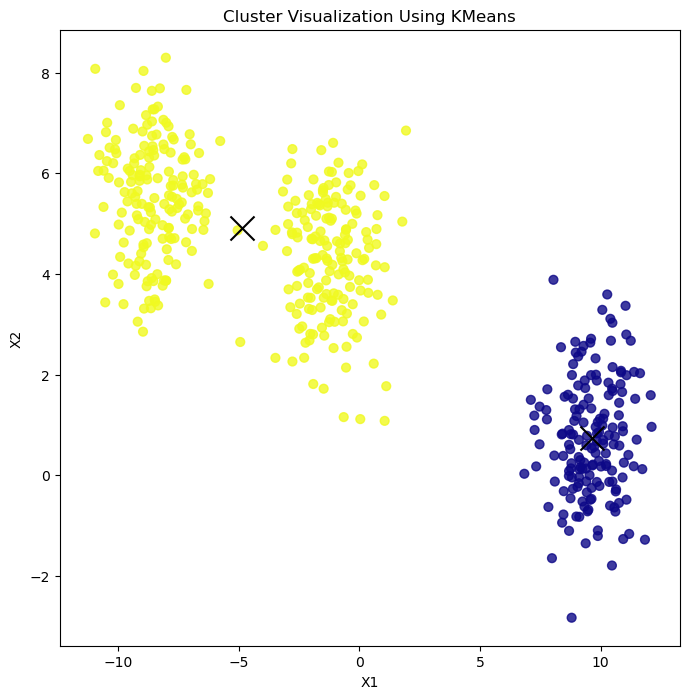

In [14]:
# Visualize KMeans clusters
plt.figure(figsize=(8,8))

plt.scatter(
    df['X1'], 
    df['X2'], 
    c=df['Cluster_KM'], 
    cmap="plasma",
    s=40,
    alpha=0.8
)

# Plot cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='black', marker='x')

plt.title("Cluster Visualization Using KMeans")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
